# Lab4 -- Data cleaning and preparation

## Handling missing data

Missing values in a dataset can occur due to several reasons such as breakdown of measuring equipment, accidental removal of observations, lack of response by respondents, error on the part of the researcher, etc.

Let us read the dataset *GDP_missing_data.csv*, in which we have randomly removed some values, or put missing values in some of the columns.

We'll also read *GDP_complete_data.csv*, in which we have not removed any values. We'll use this data later to assess the accuracy of our guess or estimate of missing values in *GDP_missing_data.csv*.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# your code here
df_complete = pd.read_csv('/content/drive/MyDrive/TUD/Na Li/lab4/GDP_complete_data.csv')
df_missing = pd.read_csv('/content/drive/MyDrive/TUD/Na Li/lab4/GDP_missing_data.csv')

Observe that the `gdp_missing_values_data` dataset consists of some missing values shown as NaN (Not a Number).

In [24]:
df_missing.head()

,economicActivityFemale,country,lifeMale,infantMortality,gdpPerCapita,economicActivityMale,illiteracyMale,illiteracyFemale,lifeFemale,geographic_location,contraception,continent
0,7.2,Afghanistan,45.0,154.0,2474.0,87.5,NaN,85.0,46.0,Southern Asia,NaN,Asia
1,7.8,Algeria,67.5,44.0,11433.0,76.4,26.1,51.0,70.3,Northern Africa,NaN,Africa
2,41.3,Argentina,69.6,22.0,NaN,76.2,3.8,3.8,76.8,South America,NaN,South America
3,52.0,Armenia,67.2,25.0,13638.0,65.0,NaN,0.5,74.0,Western Asia,NaN,Asia
4,53.8,Australia,NaN,6.0,54891.0,NaN,1.0,1.0,81.2,Oceania,NaN,Oceania


### Identifying missing values ([`isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html))
Missing values in a Pandas DataFrame can be identified with the [`isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) method. The Pandas Series object also consists of the [`isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.isnull.html) method. For finding the number of missing values in each column of `gdp_missing_values_data`, we will sum up the missing values in each column of the dataset:

In [25]:
df_missing.isna().sum()

,0
economicActivityFemale,10
country,0
lifeMale,10
infantMortality,10
gdpPerCapita,10
economicActivityMale,10
illiteracyMale,10
illiteracyFemale,10
lifeFemale,10
geographic_location,0


In [26]:
df_complete.isna().sum()

,0
economicActivityFemale,0
country,0
region,0
totalfertilityrate,0
lifeMale,0
infantMortality,0
gdpPerCapita,0
economicActivityMale,0
illiteracyMale,0
illiteracyFemale,0


Note that the descriptive statistics methods associated with Pandas objects ignore missing values by default. Consider the summary statistics of `gdp_missing_values_data`:

In [27]:
df_missing.describe()

,economicActivityFemale,lifeMale,infantMortality,gdpPerCapita,economicActivityMale,illiteracyMale,illiteracyFemale,lifeFemale,contraception
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,84.000000
mean,45.935172,65.491724,37.158621,24193.482759,76.563448,13.570028,21.448897,70.615862,51.773810
std,16.875922,9.099256,34.465699,22748.764444,7.854730,16.497954,25.497045,9.923791,31.930026
min,1.900000,36.000000,3.000000,772.000000,51.200000,0.000000,0.000000,39.100000,0.000000
25%,35.500000,62.900000,10.000000,6837.000000,72.000000,1.000000,2.300000,67.500000,17.000000
50%,47.600000,67.800000,24.000000,15184.000000,77.300000,6.600000,9.720000,73.900000,65.000000
75%,55.900000,72.400000,54.000000,35957.000000,81.600000,19.500000,30.200000,78.100000,77.000000
max,90.600000,77.400000,169.000000,122740.000000,93.000000,70.500000,90.800000,82.900000,79.000000


Observe that the `count` statistics report the number of non-missing values of each column in the data, as the number of rows in the data (see code below) is more than the number of non-missing values of all the variables in the above table. Similarly, for the rest of the statistics, such as `mean`, `std`, etc., the missing values are ignored.

In [28]:
#The dataset gdp_missing_values_data has 155 rows
# your code here
df_missing.shape

(155, 12)

### Types of missing values


Now that we know how to identify missing values in the dataset, let us learn about the types of missing values that can be there. @rubin1976inference classified missing values in three categories.

#### Missing Completely at Random (MCAR)
If the probability of being missing is the same for all cases, then the data are said to be missing completely at random. An example of MCAR is a weighing scale that ran out of batteries. Some of the data will be missing simply because of bad luck.

#### Missing at Random (MAR)
If the probability of being missing is the same only within groups defined by the observed data, then the data are missing at random (MAR). MAR is a much broader class than MCAR. For example, when placed on a soft surface, a weighing scale may produce more missing values than when placed on a hard surface. Such data are thus not MCAR. If, however, we know surface type and if we can assume MCAR within the type of surface, then the data are MAR

#### Missing Not at Random (MNAR)
MNAR means that the probability of being missing varies for reasons that are unknown to us. For example, the weighing scale mechanism may wear out over time, producing more missing data as time progresses, but we may fail to note this. If the heavier objects are measured later in time, then we obtain a distribution of the measurements that will be distorted. MNAR includes the possibility that the scale produces more missing values for the heavier objects (as above), a situation that might be difficult to recognize and handle.

*Source: https://stefvanbuuren.name/fimd/sec-MCAR.html*

### Practice exercise 1

#### In which of the above scenarios can we ignore the observations corresponding to missing values without the risk of skewing the analysis/trends in the data?

#### In which of the above scenarios will it be the more risky to impute or estimate missing values?

#### For the datset consisting of GDP per capita, think of hypothetical scenarios in which the missing values of GDP per capita can correspond to MCAR / MAR / MNAR.

### Dropping observations with missing values ([`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html))
Sometimes our analysis requires that there should be no missing values in the dataset. For example, while building statistical models, we may require the values of all the predictor variables. The quickest way is to use the `dropna()` method, which drops the observations that even have a single missing value, and leaves only complete observations in the data.

Let us drop the rows containing even a single value from `gdp_missing_values_data`.

In [29]:
# your code here
df_no_missing_data = df_missing.dropna()

In [30]:
#Shape of gdp_no_missing_data
# your code here
df_no_missing_data.shape

(42, 12)

In [11]:
df_no_missing_data.isna().sum()

,0
economicActivityFemale,0
country,0
lifeMale,0
infantMortality,0
gdpPerCapita,0
economicActivityMale,0
illiteracyMale,0
illiteracyFemale,0
lifeFemale,0
geographic_location,0


Dropping rows with even a single missing value has reduced the number of rows from 155 to 42! However, earlier we saw that all the columns except `contraception` had at most 10 missing values. Removing all rows / columns with even a single missing value results in loss of data that is non-missing in the respective rows/columns. Thus, it is typically a bad idea to drop observations with even a single missing value, except in cases where we have a very small number of missing-value observations.

If a few values of a column are missing, we can possibly estimate them using the rest of the data, so that we can (hopefully) maximize the information that can be extracted from the data. However, if most of the values of a column are missing, it may be harder to estimate its values.

In this case, we see that around 50% values of the `contraception` column is missing. Thus, we'll drop the column as it may be hard to impute its values based on a relatively small number of non-missing values.

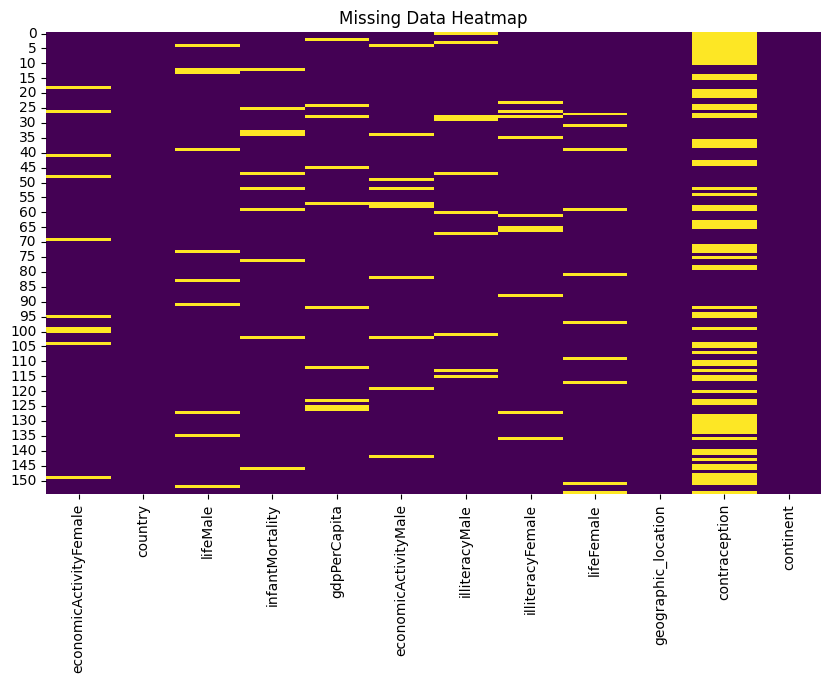

In [90]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_missing.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [100]:
#Deleting column with missing values in almost half of the observations
# your code here
df_missing_wo_con = df_missing.drop('contraception', axis=1)

In [101]:
df_missing_wo_con.shape

(155, 11)

### Some methods to impute missing values
There are an unlimited number of ways to impute missing values. Some imputation methods are provided in the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

The best way to impute them will depend on the problem, and the assumptions taken. Below are just a few examples.



#### Method 1: Naive Method
Filling the missing value of a column by copying the value of the previous non-missing observation.

In [102]:
df_missing_wo_con.isna().sum()

,0
economicActivityFemale,10
country,0
lifeMale,10
infantMortality,10
gdpPerCapita,10
economicActivityMale,10
illiteracyMale,10
illiteracyFemale,10
lifeFemale,10
geographic_location,0


In [103]:
df_missing_fill = df_missing_wo_con.copy()

In [104]:
df_missing_wo_con.isna().sum()

,0
economicActivityFemale,10
country,0
lifeMale,10
infantMortality,10
gdpPerCapita,10
economicActivityMale,10
illiteracyMale,10
illiteracyFemale,10
lifeFemale,10
geographic_location,0


In [105]:
df_missing_fill.isna().sum()

,0
economicActivityFemale,10
country,0
lifeMale,10
infantMortality,10
gdpPerCapita,10
economicActivityMale,10
illiteracyMale,10
illiteracyFemale,10
lifeFemale,10
geographic_location,0


In [106]:
#Filling missing values: Method 1- Naive way
# hint: pandas: fillna(method = 'ffill')
# your code here
df_missing_fill.fillna(method = 'ffill', inplace = True)

/tmp/ipython-input-2160331258.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_missing_fill.fillna(method = 'ffill', inplace = True)


In [107]:
df_missing_wo_con.isna().sum()

,0
economicActivityFemale,10
country,0
lifeMale,10
infantMortality,10
gdpPerCapita,10
economicActivityMale,10
illiteracyMale,10
illiteracyFemale,10
lifeFemale,10
geographic_location,0


In [108]:
df_missing_fill.isna().sum()

,0
economicActivityFemale,0
country,0
lifeMale,0
infantMortality,0
gdpPerCapita,0
economicActivityMale,0
illiteracyMale,1
illiteracyFemale,0
lifeFemale,0
geographic_location,0


After imputing missing values, note there is still one missing value for *illiteracyMale*. Can you guess why one missing value remained?

Let us check how good is this method in imputing missing values. We'll compare the imputed values of `gdpPerCapita` with the actual values. Recall that we had randomly put some missing values in `gdp_missing_values_data`, and we have the actual values in `gdp_complete_data`.

In [ ]:
# Index of rows with missing values for GDP per capita

In [109]:
df_complete.head()

,economicActivityFemale,country,region,totalfertilityrate,lifeMale,infantMortality,gdpPerCapita,economicActivityMale,illiteracyMale,illiteracyFemale,lifeFemale,geographic_location,contraception
0,7.2,Afghanistan,other,6.90,45.0,154,2474,87.5,52.8,85.0,46.0,Southern Asia,NaN
1,7.8,Algeria,other,3.81,67.5,44,11433,76.4,26.1,51.0,70.3,Northern Africa,NaN
2,41.3,Argentina,west,2.62,69.6,22,22141,76.2,3.8,3.8,76.8,South America,NaN
3,52.0,Armenia,west,1.70,67.2,25,13638,65.0,0.3,0.5,74.0,Western Asia,NaN
4,53.8,Australia,other,1.89,75.4,6,54891,74.0,1.0,1.0,81.2,Oceania,NaN


In [110]:
df_missing_fill.head()

,economicActivityFemale,country,lifeMale,infantMortality,gdpPerCapita,economicActivityMale,illiteracyMale,illiteracyFemale,lifeFemale,geographic_location,continent
0,7.2,Afghanistan,45.0,154.0,2474.0,87.5,NaN,85.0,46.0,Southern Asia,Asia
1,7.8,Algeria,67.5,44.0,11433.0,76.4,26.1,51.0,70.3,Northern Africa,Africa
2,41.3,Argentina,69.6,22.0,11433.0,76.2,3.8,3.8,76.8,South America,South America
3,52.0,Armenia,67.2,25.0,13638.0,65.0,3.8,0.5,74.0,Western Asia,Asia
4,53.8,Australia,67.2,6.0,54891.0,65.0,1.0,1.0,81.2,Oceania,Oceania


In [111]:
missing_gdp_index = df_missing_fill[df_missing_fill['gdpPerCapita'].notna()].index
print(missing_gdp_index)

RangeIndex(start=0, stop=155, step=1)


In [112]:
df_missing_fill['gdpPerCapita']

,gdpPerCapita
0,2474.0
1,11433.0
2,11433.0
3,13638.0
4,54891.0
...,...
150,2646.0
151,5178.0
152,11677.0
153,1924.0


In [128]:
# Defining a function to plot the imputed values vs actual values
def plot_actual_vs_predicted(complete, missing):
    # Index of rows with missing values for GDP per capita
    missing_gdp_index = missing[missing['gdpPerCapita'].notna()].index

    plt.figure(figsize=(8,6))
    plt.scatter(complete.loc[missing_gdp_index,'gdpPerCapita'],
                missing.loc[missing_gdp_index,'gdpPerCapita'])
    plt.xlabel('Actual GDP per Capita')
    plt.ylabel('Imputed GDP per Capita')
    plt.title('Actual vs Imputed GDP per Capita')
    plt.grid(True)
    plt.show()

    # Computing the RMSE
    rmse = np.sqrt(np.mean((complete.loc[missing_gdp_index,'gdpPerCapita'] - missing.loc[missing_gdp_index,'gdpPerCapita'])**2))
    print("RMSE=", rmse)

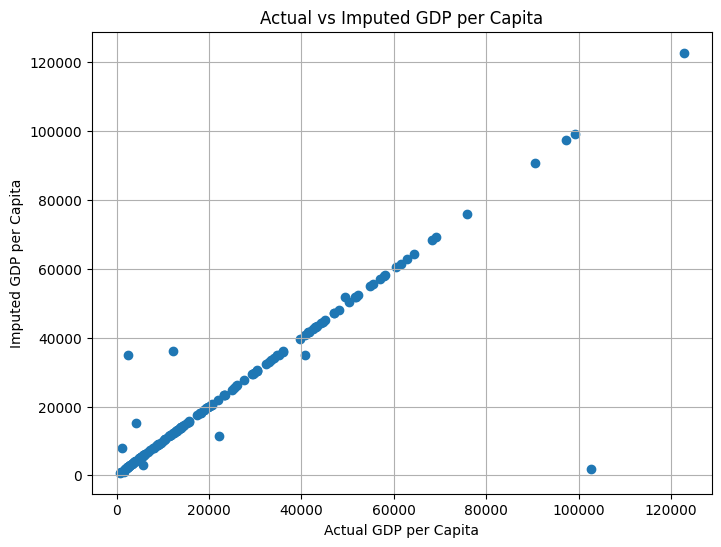

RMSE= 8850.362221856489


In [114]:
#Plot comparing imputed values with actual values, and computing the Root mean square error (RMSE) of the imputed values
plot_actual_vs_predicted(df_complete, df_missing_fill)

We observe that the accuracy of imputation is poor as GDP per capita can vary a lot across countries, and the data is not sorted by GDP per capita. There is no reason why the GDP per capita of a country should be close to the GDP per capita of the country in the observation above it.

#### Method 2: Imputing missing values as the mean of non-missing values
Let us impute missing values in the column as the average of the non-missing values of the column. The sum of squared differences between actual values and the imputed values is likely to be smaller if we impute using the mean. However, this may not be true in cases other than MCAR (Missing completely at random).

In [115]:
df_missing_wo_con.isna().sum()

,0
economicActivityFemale,10
country,0
lifeMale,10
infantMortality,10
gdpPerCapita,10
economicActivityMale,10
illiteracyMale,10
illiteracyFemale,10
lifeFemale,10
geographic_location,0


In [116]:
# Filling missing values: Method 2: mean value
df_missing_mean = df_missing_wo_con.copy()
df_missing_mean.fillna(df_missing_mean['gdpPerCapita'].mean())

,economicActivityFemale,country,lifeMale,infantMortality,gdpPerCapita,economicActivityMale,illiteracyMale,illiteracyFemale,lifeFemale,geographic_location,continent
0,7.2,Afghanistan,45.000000,154.0,2474.000000,87.500000,24193.482759,85.000,46.000000,Southern Asia,Asia
1,7.8,Algeria,67.500000,44.0,11433.000000,76.400000,26.100000,51.000,70.300000,Northern Africa,Africa
2,41.3,Argentina,69.600000,22.0,24193.482759,76.200000,3.800000,3.800,76.800000,South America,South America
3,52.0,Armenia,67.200000,25.0,13638.000000,65.000000,24193.482759,0.500,74.000000,Western Asia,Asia
4,53.8,Australia,24193.482759,6.0,54891.000000,24193.482759,1.000000,1.000,81.200000,Oceania,Oceania
...,...,...,...,...,...,...,...,...,...,...,...
150,79.3,Vanuatu,65.500000,38.0,2646.000000,88.600000,34.914000,46.368,69.500000,Oceania,Oceania
151,41.2,Venezuela,70.000000,21.0,5178.000000,82.100000,8.200000,9.700,24193.482759,South America,South America
152,74.1,Vietnam,24193.482759,37.0,11677.000000,81.600000,3.500000,8.800,69.600000,South-eastern Asia,Asia
153,1.9,Yemen,57.400000,80.0,1924.000000,80.600000,32.406000,69.552,58.400000,Western Asia,Asia


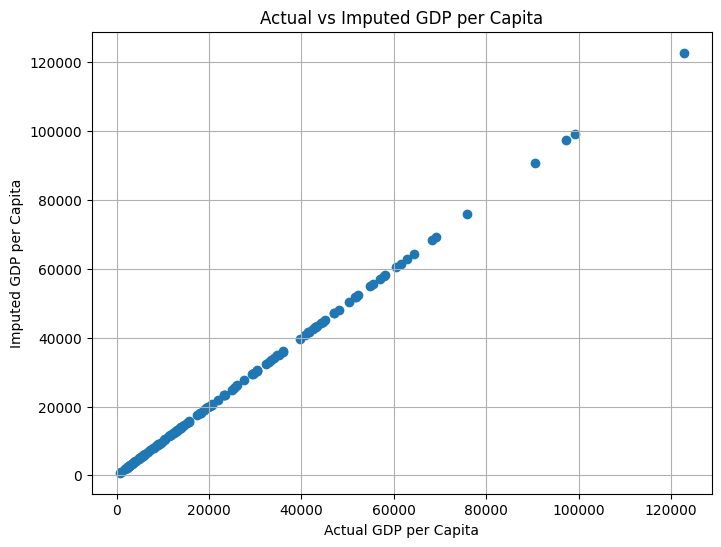

RMSE= 0.0


In [117]:
# Plot comparing imputed values with actual values
plot_actual_vs_predicted(df_complete, df_missing_mean)

Although this method of imputation doesn't seem impressive, the RMSE of the estimates is lower than that of the naive method. Since we had introduced missing values randomly in `gdp_missing_values_data`, the mean GDP per capita will be the closest constant to the GDP per capita values, in terms of squared error.

#### Method 3: Imputing missing values based on correlated variables in the data

If a variable is highly correlated with another variable in the dataset, we can approximate its missing values using the trendline with the highly correlated variable.

Let us visualize the distribution of GDP per capita for different continents.

<Axes: xlabel='continent', ylabel='gdpPerCapita'>

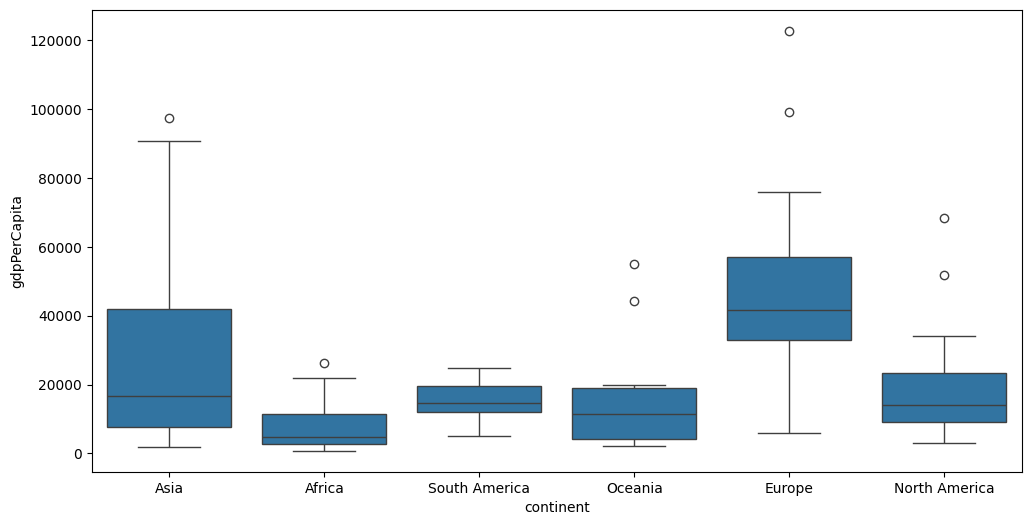

In [119]:
plt.rcParams["figure.figsize"] = (12,6)
sns.boxplot(x = 'continent',y='gdpPerCapita',data = df_missing)

We observe that there is a distinct difference between the GDPs per capita of some of the contents. Let us impute the missing GDP per capita of a country as the mean GDP per capita of the corresponding continent. This imputation should be better than imputing the missing GDP per capita as the mean of all the non-missing values, as the GDP per capita of a country is likely to be closer to the mean GDP per capita of the continent, rather the mean GDP per capita of the whole world.

In [120]:
#Finding the mean GDP per capita of the continent - please defer the understanding of this code to chapter 9.
# your code here
gdp_continent_mean = df_missing_wo_con.groupby('continent')['gdpPerCapita'].transform('mean')

In [121]:
#Creating a copy of missing data to impute missing values
# your code here
gdp_imputed_data = df_missing_wo_con.copy()

In [122]:
#Replacing missing GDP per capita with the mean GDP per capita for the corresponding continent
# your code here
gdp_imputed_data.loc[missing_gdp_index,'gdpPerCapita'] = gdp_continent_mean.loc[missing_gdp_index]

Note that the imputed values are closer to the actual values, and the RMSE has further reduced as expected.

Suppose we wish to impute the missing values of each numeric column with the average of the non-missing values of the respective column corresponding to the continent of the observation. The above logic can be extended to each column as shown in the code below.

In [125]:
# your code here
numeric_cols = df_missing_wo_con.select_dtypes(include=np.number).columns.tolist()
df_missing_continent_mean_imputed = df_missing_wo_con.copy()
df_missing_continent_mean_imputed[numeric_cols] = df_missing_wo_con.groupby('continent')[numeric_cols].transform(lambda x: x.fillna(x.mean()))

#### Practice exercise 2
Find the numeric variable most strongly correlated with GDP per capita, and use it to impute its missing values. Find the RMSE of the imputed values.

**Solution:**

In [126]:
#Let us identify the variable highly correlated with GDP per capita.
# your code here
numeric_df_missing = df_missing_wo_con.select_dtypes(include=np.number)
correlation_matrix = numeric_df_missing.corr()
gdp_correlation = correlation_matrix['gdpPerCapita'].sort_values(ascending=False)
print(gdp_correlation)

gdpPerCapita              1.000000
lifeFemale                0.615954
lifeMale                  0.579850
economicActivityFemale    0.078332
economicActivityMale     -0.134108
illiteracyFemale         -0.448273
illiteracyMale           -0.479143
infantMortality          -0.572201
Name: gdpPerCapita, dtype: float64


/tmp/ipython-input-1985869056.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_missing_correlated_imputed['gdpPerCapita'].fillna(df_missing_correlated_imputed['gdpPerCapita'].mean(), inplace=True)


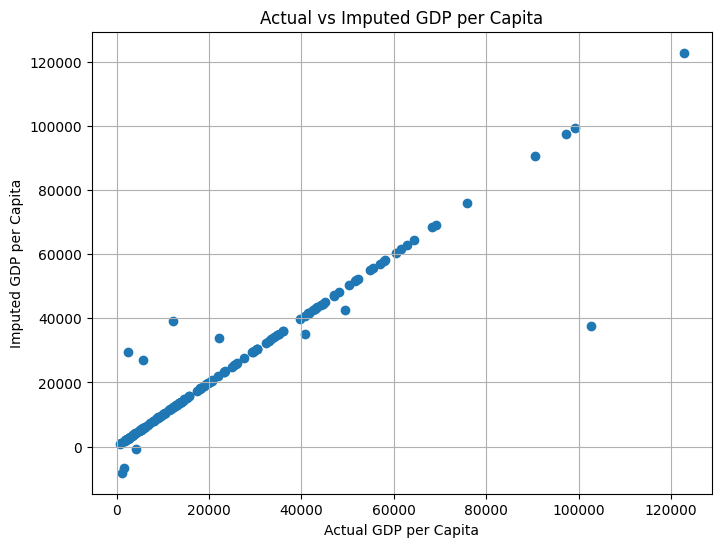

RMSE= 6494.878320188644


In [127]:
#The variable *lifeFemale* has the strongest correlation with GDP per capita. Let us use it to impute missing values of GDP per capita.
# your code here
# Create a copy to avoid modifying the original dataframe
df_missing_correlated_imputed = df_missing_wo_con.copy()

# Fit a linear regression model to predict GDP per Capita using lifeFemale on non-missing data
from sklearn.linear_model import LinearRegression

# Drop rows with missing values in either 'gdpPerCapita' or 'lifeFemale' for training
train_data = df_missing_correlated_imputed.dropna(subset=['gdpPerCapita', 'lifeFemale'])

if not train_data.empty:
    X_train = train_data[['lifeFemale']]
    y_train = train_data['gdpPerCapita']

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict missing GDP per Capita values using the trained model
    missing_gdp_life_female_index = df_missing_correlated_imputed[df_missing_correlated_imputed['gdpPerCapita'].isna() & df_missing_correlated_imputed['lifeFemale'].notna()].index
    if not missing_gdp_life_female_index.empty:
        X_predict = df_missing_correlated_imputed.loc[missing_gdp_life_female_index, ['lifeFemale']]
        predicted_gdp = model.predict(X_predict)
        df_missing_correlated_imputed.loc[missing_gdp_life_female_index, 'gdpPerCapita'] = predicted_gdp

# For any remaining missing GDP per Capita values where lifeFemale was also missing, use the mean imputation as a fallback
df_missing_correlated_imputed['gdpPerCapita'].fillna(df_missing_correlated_imputed['gdpPerCapita'].mean(), inplace=True)

# Update the df_missing_wo_con to the imputed dataframe for the next plotting step
df_missing_wo_con = df_missing_correlated_imputed

# Plot and calculate RMSE
plot_actual_vs_predicted(df_complete, df_missing_wo_con)

#### Method 4: KNN: K-nearest neighbor

In this method, we'll impute the missing value of the variable as the mean value of the $K$-nearest neighbors having non-missing values for that variable. The neighbors to a data-point are identified based on their Euclidean distance to the point in terms of the standardized values of rest of the variables in the data.

Let's consider a toy example to understand missing value imputation by KNN. Suppose we have to impute missing values in a toy dataset, named as `toy_data` having 4 observations and 3 variables.

In [137]:
#Toy example - A 4x3 array with missing values
nan = np.nan
toy_data = np.array([[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]])
toy_data

array([[ 1.,  2., nan],
       [ 3.,  4.,  3.],
       [nan,  6.,  5.],
       [ 8.,  8.,  7.]])

We'll use some functions from the *sklearn* library to perform the KNN imputation. It is much easier to directly use the algorithm from *sklearn*, instead of coding it from scratch.

In [138]:
#Library to compute pair-wise Euclidean distance between all observations in the data
from sklearn import metrics

#Library to impute missing values with the KNN algorithm
from sklearn import impute

We'll use the *sklearn* function [nan_euclidean_distances()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html) to compute the Euclidean distance between all pairs of observations in the data.

In [139]:
#This is the distance matrix containing the distance of the ith observation from the jth observation at the (i,j) position in the matrix
metrics.pairwise.nan_euclidean_distances(toy_data,toy_data)

array([[ 0.        ,  3.46410162,  6.92820323, 11.29158979],
       [ 3.46410162,  0.        ,  3.46410162,  7.54983444],
       [ 6.92820323,  3.46410162,  0.        ,  3.46410162],
       [11.29158979,  7.54983444,  3.46410162,  0.        ]])

Note that the size of the above matrix is 4x4. This is because the $(i,j)^{th}$ element of the matrix is the distance of the $i^{th}$ observation from the $j^{th}$ observation. The matrix is symmetric because the distance of $i^{th}$ observation to the $j^{th}$ observation is the same as the distance of the $j^{th}$ observation to the $i^{th}$ observation.

We'll use the *sklearn* function [KNNImputer()](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) to impute the missing value of a column in `toy_data` as the mean of the values of the $K$ nearest neighbors to the observation that have non-missing values for that column.

Let us impute the missing values in `toy_data` using the values of $K=2$ nearest neighbors from the corresponding observation.

In [140]:
#imputing missing values with 2 nearest neighbors, where the neighbors have equal weights

#Define an object of type KNNImputer
imputer = impute.KNNImputer(n_neighbors=2)

#Use the object method 'fit_transform' to impute missing values
imputer.fit_transform(toy_data)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

The third observation was the closest to the $2nd$ and $4th$ observations based on the Euclidean distance matrix. Thus, the missing value in the $3rd$ row of the `toy_data` has been imputed as the mean of the values in the $2nd$ and $4th$ observations for the corresponding column. Similarly, the $1st$ observation is the closest to the $2nd$ and $3rd$ observations. Thus the missing value in the $1st$ row of `toy_data` has been imputed as the mean of the values in the $1st$ and $2nd$ observations for the corresponding column.

Let us use KNN to impute the missing values of `gdpPerCapita` in `gdp_missing_values_data`. We'll use only the numeric columns of the data in imputing the missing values. Also, we'll ignore `contraception` as it has a lot of missing values, and thus may not be useful.

In [141]:
#Considering numeric columns in the data to use KNN
num_cols = list(range(0,1))+list(range(2,9))
num_cols

[0, 2, 3, 4, 5, 6, 7, 8]

Before computing the pair-wise Euclidean distance of observations, we must standardize the data so that all columns are at the same scale. This will avoid columns with a higher magnitude of values having a higher weight in determining the Euclidean distance. Unless there is a reason to give a higher weight to a column, we assume all columns to have the same weight in the Euclidean distance computation.

We can use the code below to scale the data. However, after imputing the missing values, the data is to be scaled back to the original scale, so that each variable is in the same units as in the original dataset. However, if the code below is used, we'll lose the orginal scale of each of the columns.

In [143]:
#Scaling data to compute equally weighted distances from the 'k' nearest neighbors
scaled_data = df_missing.iloc[:,num_cols].apply(lambda x:(x-x.min())/(x.max()-x.min()))

To alleviate the problem of losing the orignial scale of the data, we'll use the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) object of the *sklearn* library. The object will store the original scale of the data, which will help transform the data back to the original scale once the missing values have been imputed in the standardized data.

In [144]:
# Scaling data - using sklearn
#Create an object of type MinMaxScaler
# your code here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Use the object method 'fit_transform' to scale the values to a standard uniform distribution
# your code here
num_cols = [col for col in df_missing_wo_con.columns if df_missing_wo_con[col].dtype in ['int64', 'float64']]
scaled_data = scaler.fit_transform(df_missing_wo_con[num_cols])

In [145]:
#Imputing missing values with KNNImputer

#Define an object of type KNNImputer
from sklearn import impute
imputer = impute.KNNImputer(n_neighbors=3, weights="uniform")

#Use the object method 'fit_transform' to impute missing values
imputed_arr = imputer.fit_transform(scaled_data)

In [146]:
#Scaling back the scaled array to obtain the data at the original scale

#Use the object method 'inverse_transform' to scale back the values to the original scale of the data
# your code here
unscaled_data = scaler.inverse_transform(imputed_arr)

In [147]:
#Note the method imputes the missing value of all the columns
#However, we are interested in imputing the missing values of only the 'gdpPerCapita' column
gdp_imputed_data = df_missing.copy()
gdp_imputed_data.loc[:,'gdpPerCapita'] = unscaled_data[:,3]

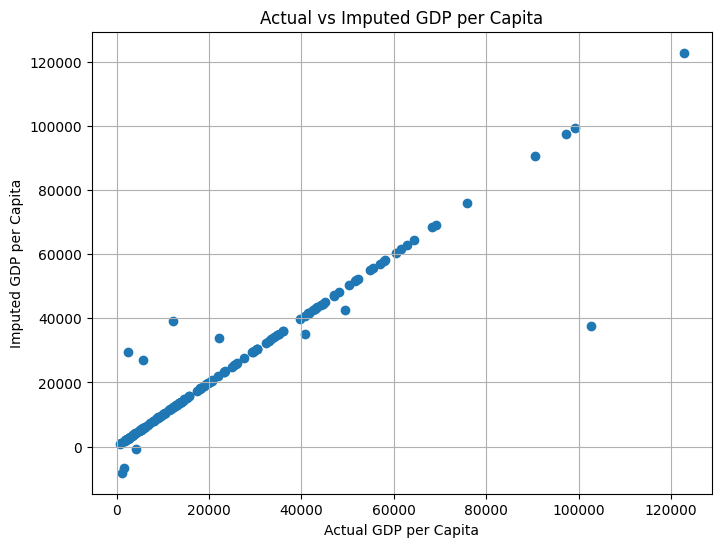

RMSE= 6494.878320188644


In [148]:
#Visualizing the accuracy of missing value imputation with KNN
plot_actual_vs_predicted(df_complete, gdp_imputed_data)

Note that the RMSE is the lowest in this method. It is because this method imputes missing values as the average of the values of "similar" observations, which is smarter and more robust than the previous methods.

We chose $K=3$ in the missing value imputation for GDP per capita. However, the value of $K$ is typically chosen using a method known as cross validation. We'll learn about cross-validation in the next course of the sequence.

## Data binning
Data binning is a method to group values of a continuous / categorical variable into bins (or categories). Binning may help with

(i) Better intepretation of data \
(ii) Making better recommendations \
(iii) Smooth data, reduce noise

Examples:

**Binning to better interpret data**

1. The number of flu cases everyday may be binned to seasons such as fall, spring, winter and summer, to understand the effect of season on flu.

**Binning to make recommendations:**

2. A doctor may like to group patient age into bins. Grouping patient ages into categories such as Age <=12, 12<Age<=18, 18<Age<=65, Age>65 may help recommend the kind/doses of covid vaccine a patient needs.

3. A credit card company may want to bin customers based on their spend, as "High spenders", "Medium spenders" and "Low spenders". Binning will help them design customized marketing campaigns for each bin, thereby increasing customer response (or revenue). On the other hand, they use the same campaign for customers withing the same bin, thus minimizng marketing costs.

**Binning to smooth data, and reduce noise**

4. A sales company may want to bin their total sales to a weekly / monthly / yearly level to reduce the noise in day-to-day sales.


**Example:** The dataset *College.csv* contains information about US universities. The description of variables of the dataset can be found on page 54 of this [book](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf). Let's see if we can apply binning to better interpret the association of instructional expenditure per student (`Expend`) with graduation rate (`Grad.Rate`) for US universities, and make recommendations.

In [149]:
# your code here
college = pd.read_csv('/content/drive/MyDrive/TUD/Na Li/lab4/College.csv')
display(college.head())

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


To visualize the association between two numeric variables, we typically make a scatterplot. Let us make a scatterplot of graduation rate with expenditure per student, with a trendline.

Text(0.5, 1.0, 'Graduation Rate vs Expenditure per Student')

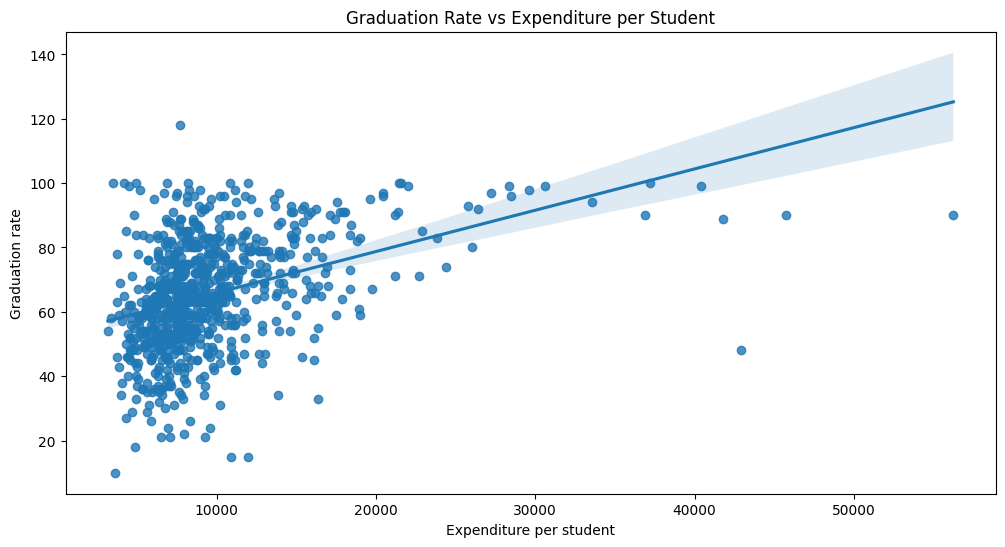

In [150]:
#Let's make a scatterplot of 'Grad.Rate' vs 'Expend' with a trendline, to visualize any trend(s).
# your code here
sns.regplot(x='Expend', y='Grad.Rate', data=college)
plt.xlabel('Expenditure per student')
plt.ylabel('Graduation rate')
plt.title('Graduation Rate vs Expenditure per Student')

The trendline indicates a positive correlation between `Expend` and `Grad.Rate`. However, there seems to be a lot of noise and presence of outliers in the data, which makes it hard to interpret the overall trend.

We'll bin `Expend` to see if we can better analyze its association with `Grad.Rate`. However, let us first visualize the distribution of `Expend`.

Text(0.5, 1.0, 'Distribution of Expenditure per Student')

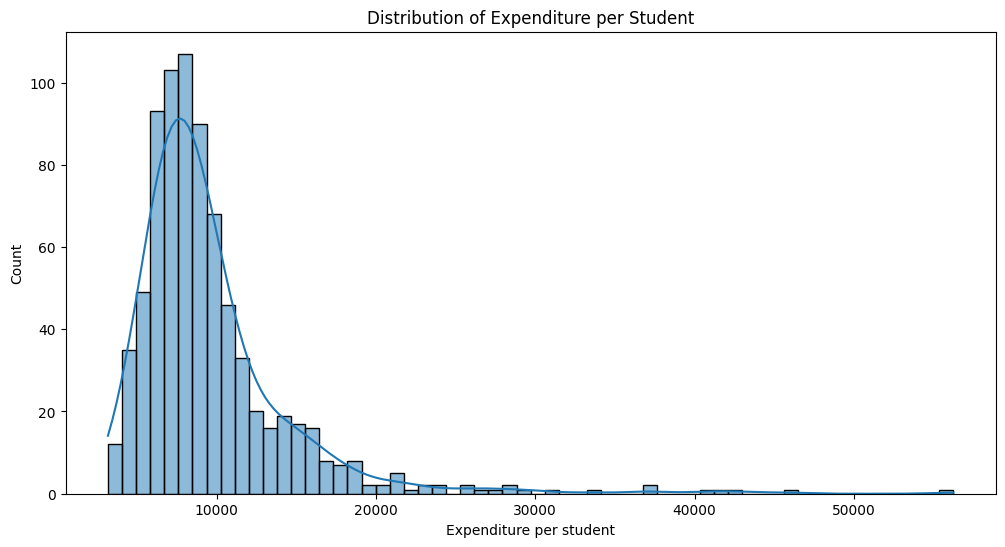

In [151]:
#Visualizing the distribution of expend
# your code here
sns.histplot(data=college, x='Expend', kde=True)
plt.xlabel('Expenditure per student')
plt.title('Distribution of Expenditure per Student')

The distribution of `Extend` is right skewed with potentially some extremely high outlying values.

### Binning with equal width bins

We'll use the Pandas function [cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) to bin `Expend`. This function creates bins such that all bins have the same width.

In [152]:
#Using the cut() function in Pandas to bin "Expend"
# your code here
Binned_expend = pd.cut(college['Expend'], 3, retbins=True)
print(Binned_expend)

(0      (3132.953, 20868.333]
1      (3132.953, 20868.333]
2      (3132.953, 20868.333]
3      (3132.953, 20868.333]
4      (3132.953, 20868.333]
               ...          
772    (3132.953, 20868.333]
773    (3132.953, 20868.333]
774    (3132.953, 20868.333]
775     (38550.667, 56233.0]
776    (3132.953, 20868.333]
Name: Expend, Length: 777, dtype: category
Categories (3, interval[float64, right]): [(3132.953, 20868.333] < (20868.333, 38550.667] <
                                           (38550.667, 56233.0]], array([ 3132.953     , 20868.33333333, 38550.66666667, 56233.        ]))


The [cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) function returns a tuple of length 2. The first element of the tuple are the bins, while the second element is an array containing the cut-off values for the bins.

In [153]:
type(Binned_expend)

tuple

In [154]:
len(Binned_expend)

2

Once the bins are obtained, we'll add a column in the dataset that indicates the bin for `Expend`.

In [155]:
#Creating a categorical variable to store the level of expenditure on a student
# your code here
college['Expend_bin'] = Binned_expend[0]
display(college.head())

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Expend_bin
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,"(3132.953, 20868.333]"
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,"(3132.953, 20868.333]"
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,"(3132.953, 20868.333]"
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,"(3132.953, 20868.333]"
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,"(3132.953, 20868.333]"


See the variable `Expend_bin` in the above dataset.

Let us visualize the `Expend` bins over the distribution of the `Expend` variable.

Text(0.5, 1.0, 'Distribution of Expenditure per Student with Equal Width Bins')

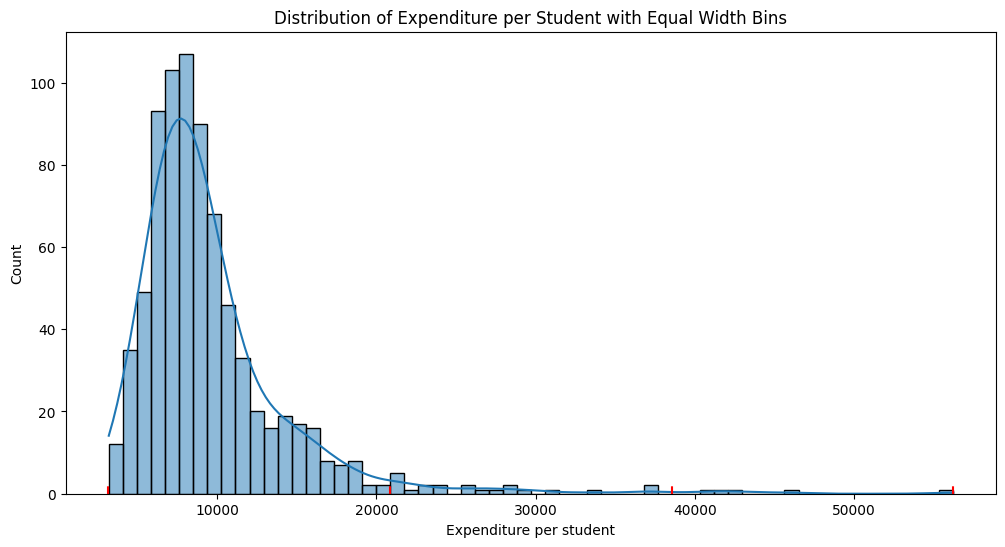

In [156]:
#Visualizing the bins for instructional expediture on a student
# your code here
sns.histplot(data=college, x='Expend', kde=True)
plt.vlines(Binned_expend[1], ymin=0, ymax=college['Expend'].value_counts().max(), color='red', linestyles='dashed')
plt.xlabel('Expenditure per student')
plt.title('Distribution of Expenditure per Student with Equal Width Bins')

By default, the bins created have equal width. They are created by dividing the range between the maximum and minimum value of `Expend` into the desired number of equal-width intervals. We can label the bins as well as follows.

In [157]:
# your code here
college['Expend_bin'] = pd.cut(college['Expend'], 3, labels=['Low expend', 'Med expend', 'High expend'])
print(college['Expend_bin'])

0       Low expend
1       Low expend
2       Low expend
3       Low expend
4       Low expend
          ...     
772     Low expend
773     Low expend
774     Low expend
775    High expend
776     Low expend
Name: Expend_bin, Length: 777, dtype: category
Categories (3, object): ['Low expend' < 'Med expend' < 'High expend']


Now that we have binned the variable `Expend`, let us see if we can better visualize the association of graduation rate with expenditure per student using `Expened_bin`.

Text(0.5, 1.0, 'Average Graduation Rate by Expenditure Bin (Equal Width)')

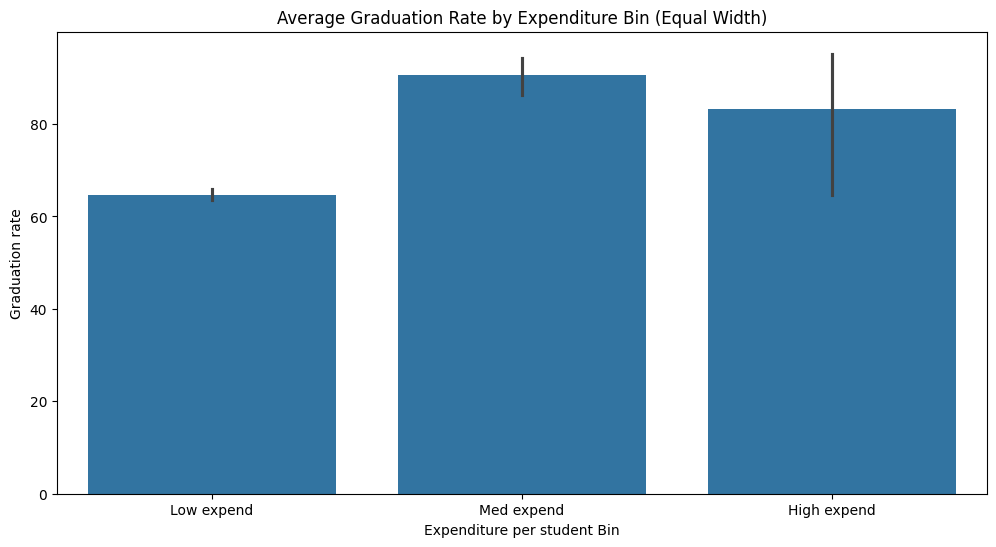

In [158]:
#Visualizing average graduation rate vs categories of instructional expenditure per student
# your code here
sns.barplot(x='Expend_bin', y='Grad.Rate', data=college)
plt.xlabel('Expenditure per student Bin')
plt.ylabel('Graduation rate')
plt.title('Average Graduation Rate by Expenditure Bin (Equal Width)')

It seems that the graduation rate is the highest for universities with medium level of expenditure per student. This is different from the trend we saw earlier in the scatter plot. Let us investigate.

Let us find the number of universities in each bin.

In [159]:
# your code here
college['Expend_bin'].value_counts()

,count
Expend_bin,
Low expend,751
Med expend,21
High expend,5


The bin `High expend` consists of only 5 universities, or 0.6% of all the universities in the dataset. These universities may be outliers that are skewing the trend (as also evident in the histogram above).

In such cases, we should bin observations such that all bins are of equal size, i.e., they have the same number of observations.

### Binning with equal sized bins

Let us bin the variable `Expend` such that each bin consists of the same number of observations.

We'll use the Pandas function [qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) to make equal-sized bins (in contrast to equal-width bins in the previous section).

In [160]:
#Using the Pandas function qcut() to create bins with the same number of observations
Binned_expend = pd.qcut(college['Expend'],3,retbins = True)
college['Expend_bin'] = Binned_expend[0]

Each bin has the same number of observations with `qcut()`:

In [161]:
pd.value_counts(college['Expend_bin'])

/tmp/ipython-input-90039880.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(college['Expend_bin'])


,count
Expend_bin,
"(3185.999, 7334.333]",259
"(7334.333, 9682.333]",259
"(9682.333, 56233.0]",259


Let us visualize the `Expend` bins over the distribution of the `Expend` variable.

Text(0.5, 1.0, 'Distribution of Expenditure per Student with Equal Sized Bins')

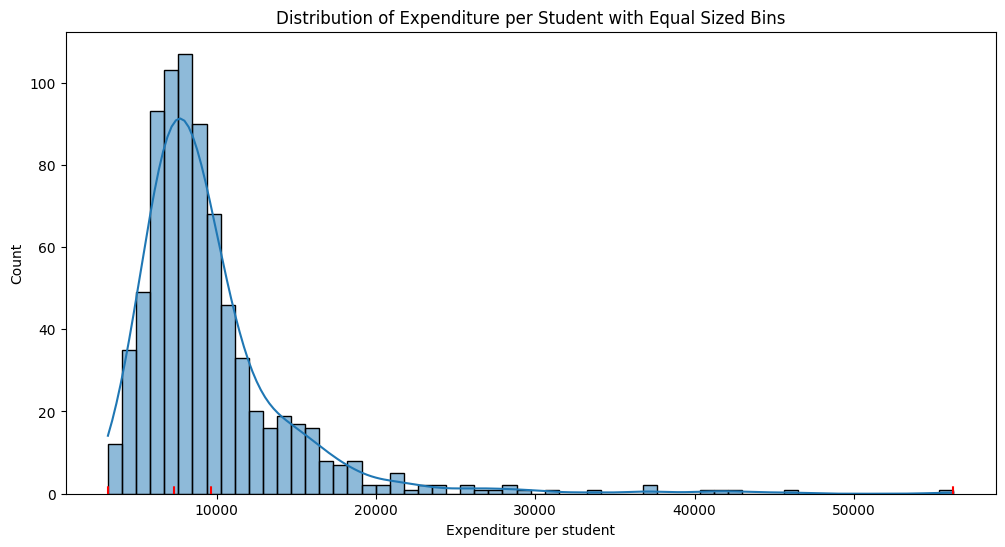

In [162]:
#Visualizing the bins for instructional expediture on a student
# your code here
sns.histplot(data=college, x='Expend', kde=True)
plt.vlines(Binned_expend[1], ymin=0, ymax=college['Expend'].value_counts().max(), color='red', linestyles='dashed')
plt.xlabel('Expenditure per student')
plt.title('Distribution of Expenditure per Student with Equal Sized Bins')

Note that the bin-widths have been adjusted to have the same number of observations in each bin. The bins are narrower in domains of high density, and wider in domains of sparse density.

Let us again make the barplot visualizing the average graduate rate with level of instructional expenditure per student.

Text(0.5, 1.0, 'Average Graduation Rate by Expenditure Bin (Equal Sized)')

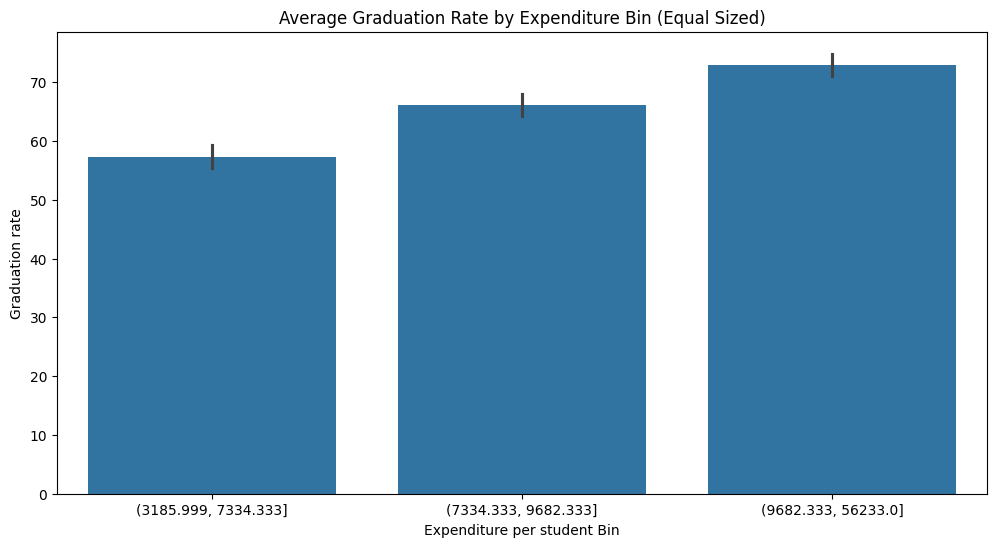

In [163]:
# your code here
sns.barplot(x='Expend_bin', y='Grad.Rate', data=college)
plt.xlabel('Expenditure per student Bin')
plt.ylabel('Graduation rate')
plt.title('Average Graduation Rate by Expenditure Bin (Equal Sized)')

Now we see the same trend that we saw in the scatterplot, but without the noise. We have smoothed the data. Note that making equal-sized bins helps reduce the effect of outliers in the overall trend.

Suppose this analysis was done to provide recommendations to universities for increasing their graduation rate. With binning, we can can provide one recommendation to *'Low expend'* universities, and another one to *'Med expend'* universities. For example, the recommendations can be:

1. *'Low expend'* universities can expect an increase of 9 percentage points in `Grad.Rate`, if they migrate to the *'Med expend'* category.
2. *'Med expend'* universities can expect an increase of 7 percentage points in `Grad.Rate`, if they migrate to the *'High expend'* category.

The numbers in the above recommendations are based on the table below.

In [164]:
# your code here
college.groupby('Expend_bin')['Grad.Rate'].mean()

/tmp/ipython-input-2561473282.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  college.groupby('Expend_bin')['Grad.Rate'].mean()


,Grad.Rate
Expend_bin,
"(3185.999, 7334.333]",57.343629
"(7334.333, 9682.333]",66.057915
"(9682.333, 56233.0]",72.988417


We can also make recommendations based on the confidence intervals of mean Grad.Rate. Confidence intervals are computed below. We are finding confidence intervals based on a method known as bootstrapping. Refer https://en.wikipedia.org/wiki/Bootstrapping_(statistics) for a detailed description of Bootstrapping.

In [166]:
#Bootstrapping to find 95% confidence intervals of Graduation Rate of US universities based on average expenditure per student
for expend_bin in college.Expend_bin.unique():
    data_sub = college.loc[college.Expend_bin==expend_bin,:]
    samples = np.random.choice(data_sub['Grad.Rate'], size=(10000,data_sub.shape[0]))
    print("95% Confidence interval of Grad.Rate for "+str(expend_bin)+" univeristies = ["+str(np.round(np.percentile(samples.mean(axis=1),2.5),2))+","+str(np.round(np.percentile(samples.mean(axis=1),97.5),2))+"]")

95% Confidence interval of Grad.Rate for (3185.999, 7334.333] univeristies = [55.42,59.3]
95% Confidence interval of Grad.Rate for (9682.333, 56233.0] univeristies = [71.02,74.93]
95% Confidence interval of Grad.Rate for (7334.333, 9682.333] univeristies = [64.17,67.88]


Apart from equal-width and equal-sized bins, custom bins can be created using the *bins* argument. Suppose, bins are to be created for `Expend` with cutoffs $\$10,000, \$20,000, \$30,000... \$60,000$. Then, we can use the *bins* argument as in the code below:

### Binning with custom bins

In [167]:
Binned_expend = pd.cut(college.Expend,bins = list(range(0,70000,10000)),retbins=True)

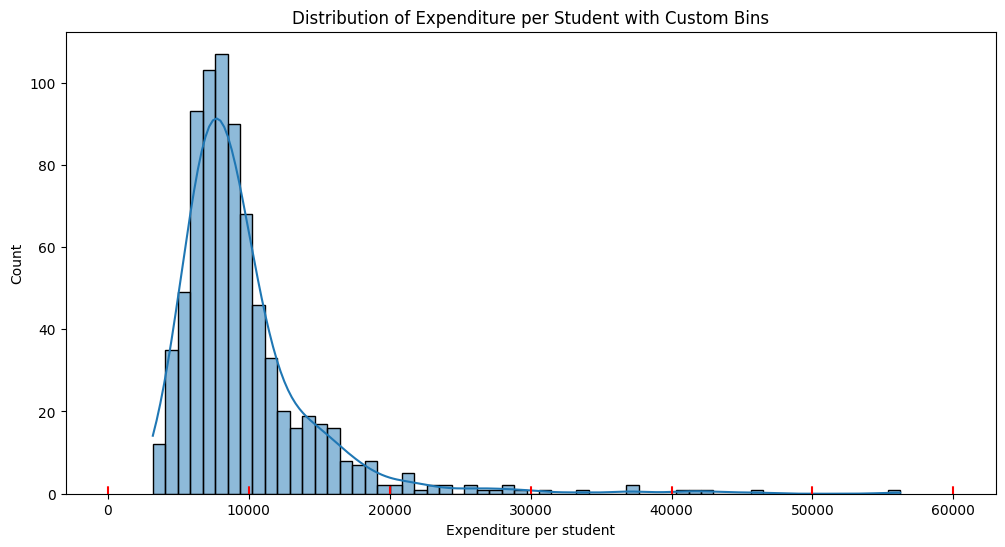

In [169]:
#Visualizing the bins for instructional expediture on a student
# your code here
sns.histplot(data=college, x='Expend', kde=True)
plt.vlines(Binned_expend[1], ymin=0, ymax=college['Expend'].value_counts().max(), color='red', linestyles='dashed')
plt.xlabel('Expenditure per student')
plt.title('Distribution of Expenditure per Student with Custom Bins')
plt.show()

As custom bin-cutoffs can be specified with the `cut()` function, custom bin quantiles can be specified with the `qcut()` function.

## Dummy / Indicator variables

Dummy variables (or indicator variables) take only the values of 0 and 1 to indicate the presence or absence of a catagorical effect. They are particularly useful in regression modeling to help explain the dependent variable.

If a column in a DataFrame has $k$ distinct values, we will get a DataFrame with $k$ columns containing 0s and 1s with the Pandas [`get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function.

Let us make dummy variables with the equal-sized bins we created for the average instruction expenditure per student.

In [170]:
#Using the Pandas function qcut() to create bins with the same number of observations
Binned_expend = pd.qcut(college['Expend'],3,retbins = True,labels = ['Low_expend','Med_expend','High_expend'])
college['Expend_bin'] = Binned_expend[0]

In [171]:
#Making dummy variables based on the levels (categories) of the 'Expend_bin' variable
dummy_Expend = pd.get_dummies(college['Expend_bin'])

The dummy data `dummy_Expend` has a value of $1$ if the observation corresponds to the category referenced by the column name.

In [172]:
dummy_Expend.head()

,Low_expend,Med_expend,High_expend
0,True,False,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,False,True


We can find the correlation between the dummy variables and graduation rate to identify if any of the dummy variables will be useful to estimate graduation rate (`Grad.Rate`).

In [173]:
#Finding if dummy variables will be useful to estimate 'Grad.Rate'
# dummy_Expend.corrwith(college['Grad.Rate'])
# your code here
dummy_Expend.corrwith(college['Grad.Rate'])

,0
Low_expend,-0.334456
Med_expend,0.024492
High_expend,0.309964


The dummy variables `Low expend` and `High expend` may contribute in explaining `Grad.Rate` in a regression model.

### Practice exercise 3

Read *survey_data_clean.csv*. Split the columns of the dataset, such that all columns with categorical values transform into dummy variables with each category corresponding to a column of 0s and 1s. Leave the *Timestamp* column.

As all categorical columns are transformed to dummy variables, all columns have numeric values.

What is the total number of columns in the transformed data? What is the total number of columns of the original data?

Find the:

1. Top 5 variables having the highest positive correlation with `NU_GPA`.

2. Top 5 variables having the highest negative correlation with `NU_GPA`.

**Solution:**

In [174]:
# your code here
survey_data = pd.read_csv('/content/drive/MyDrive/TUD/Na Li/lab4/survey_data_clean.csv')

# Identify categorical columns excluding 'Timestamp'
categorical_cols = survey_data.select_dtypes(include='object').columns.tolist()
if 'Timestamp' in categorical_cols:
    categorical_cols.remove('Timestamp')

# Create dummy variables for categorical columns
survey_dummies = pd.get_dummies(survey_data, columns=categorical_cols, dummy_na=False)

# Drop the original categorical columns (except Timestamp if it was not in categorical_cols)
# Ensure Timestamp is not dropped if it was not in the initial categorical_cols list
cols_to_drop = [col for col in categorical_cols if col in survey_dummies.columns]
survey_dummies = survey_dummies.drop(columns=cols_to_drop)


print("The total number of columns in the transformed data are", survey_dummies.shape[1])
print("The total number of columns in the original data are", survey_data.shape[1])

The total number of columns in the transformed data are 308
The total number of columns in the original data are 51


Below are the top 5 variables having the highest positive correlation with `NU_GPA`:

In [176]:
# your code here
correlation_with_gpa = survey_dummies.drop(columns=['Timestamp']).corr()['NU_GPA'].sort_values(ascending=False)
print(correlation_with_gpa.head(6)) # Including NU_GPA itself

NU_GPA                                                                                    1.000000
fav_letter_o                                                                              0.367140
fav_sport_Dance!                                                                          0.367140
major_Humanities / Communications;Physical Sciences / Natural Sciences / Engineering      0.271019
fav_alcohol_I don't drink                                                                 0.213118
learning_style_Reading/Writing (learn best through words often note-taking or reading)    0.207451
Name: NU_GPA, dtype: float64


Below are the top 5 variables having the highest negative correlation with `NU_GPA`:

In [177]:
# your code here
print(correlation_with_gpa.tail(5))

fav_sport_pool               NaN
fav_sport_swimming           NaN
fav_sport_ultimate frisbee   NaN
fav_letter_n                 NaN
fav_letter_x                 NaN
Name: NU_GPA, dtype: float64


## Outlier detection

An outlier is an observation that is significantly different from the rest of the data. Detection of outliers is important as they may distort the general trends in data.

Let us visualize outliers in average instructional expenditure per student given by the variable `Expend`.

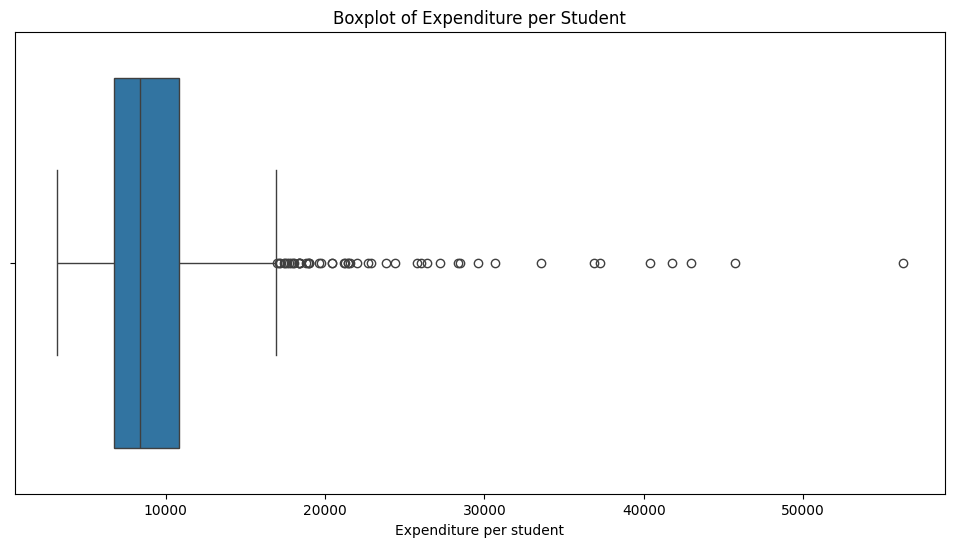

There are several outliers (shown as circles in the above boxplot), which correspond to high values of average instructional expenditure per student. Boxplot identifies outliers based on the [Tukey's fences](https://en.wikipedia.org/wiki/Outlier) criterion:

**Tukey's fences:**
John Tukey proposed that observations outside the range $[Q1 - 1.5(Q3-Q1), Q3+1.5(Q3-Q1)]$ are outliers, where $Q1$ and $Q3$ are the lower $(25\%)$ and upper $(75\%)$ quartiles respectively. Let us detect outliers based on Tukey's fences.

In [179]:
#Finding upper and lower quartiles and interquartile range
q1 = np.percentile(college['Expend'],25)
q3 = np.percentile(college['Expend'],75)
intQ_range = q3-q1

In [180]:
#Tukey's fences
# your code here
Lower_fence = q1 - 1.5*intQ_range
Upper_fence = q3 + 1.5*intQ_range
print("Lower Fence:", Lower_fence)
print("Upper Fence:", Upper_fence)

Lower Fence: 632.5
Upper Fence: 16948.5


In [181]:
#These are the outlying observations - those outside of Tukey's fences
# your code here
outliers = college[(college['Expend'] < Lower_fence) | (college['Expend'] > Upper_fence)]
display(outliers)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Expend_bin
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,High_expend
16,Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100,High_expend
20,Antioch University,Yes,713,661,252,25,44,712,23,15476,3336,400,1100,69,82,11.3,35,42926,48,High_expend
60,Bowdoin College,Yes,3356,1019,418,76,100,1490,8,19030,5885,1495,875,93,96,11.2,52,20447,96,High_expend
64,Brandeis University,Yes,4186,2743,740,48,77,2819,62,19380,6750,410,1000,90,97,9.8,24,17150,84,High_expend
70,Brown University,Yes,12586,3239,1462,87,95,5643,349,19528,5926,720,1100,99,100,7.6,39,20440,97,High_expend
71,Bryn Mawr College,Yes,1465,810,313,71,95,1088,16,18165,6750,500,1200,100,100,12.3,49,17449,89,High_expend
86,Carleton College,Yes,2694,1579,489,75,93,1870,12,19292,3957,550,550,81,93,10.4,60,17960,91,High_expend
87,Carnegie Mellon University,Yes,8728,5201,1191,60,89,4265,291,17900,5690,450,1250,86,93,9.2,31,24386,74,High_expend
91,Case Western Reserve University,Yes,3877,3156,713,71,93,3051,513,15700,4730,525,1460,95,95,2.9,29,19733,67,High_expend


In [182]:
#Data without outliers
# your code here
college_data_without_outliers = college[(college['Expend'] >= Lower_fence) & (college['Expend'] <= Upper_fence)].copy()

Earlier, the trend was distorted by outliers when we created bins of equal width. Let us see if we get the correct trend with the outliers removed from the data.

In [183]:
Binned_data = pd.cut(college_data_without_outliers['Expend'],3,labels = ['Low expend','Med expend','High expend'],retbins = True)
college_data_without_outliers.loc[:,'Expend_bin'] = Binned_data[0]

/tmp/ipython-input-2673864035.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Low expend', 'Med expend', 'Med expend', 'Med expend', 'Med expend', ..., 'Med expend', 'Low expend', 'Med expend', 'Med expend', 'Low expend']
Length: 729
Categories (3, object): ['Low expend' < 'Med expend' < 'High expend']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  college_data_without_outliers.loc[:,'Expend_bin'] = Binned_data[0]


<Axes: xlabel='Expend_bin', ylabel='Grad.Rate'>

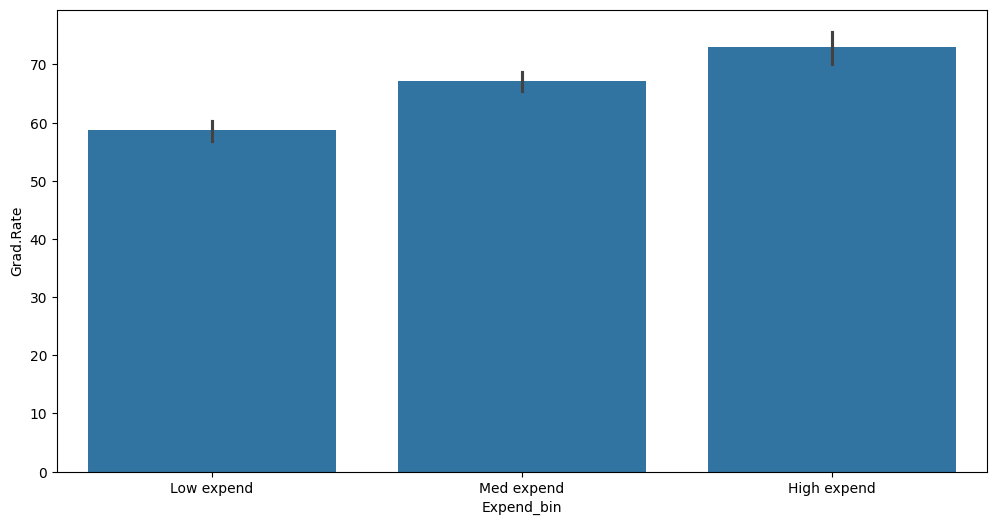

In [184]:
sns.barplot(x = 'Expend_bin', y = 'Grad.Rate', data = college_data_without_outliers)

With the outliers removed, we obtain the correct overall trend, even in the case of equal-width bins. Note that these bins have unequal number of observations as shown below.

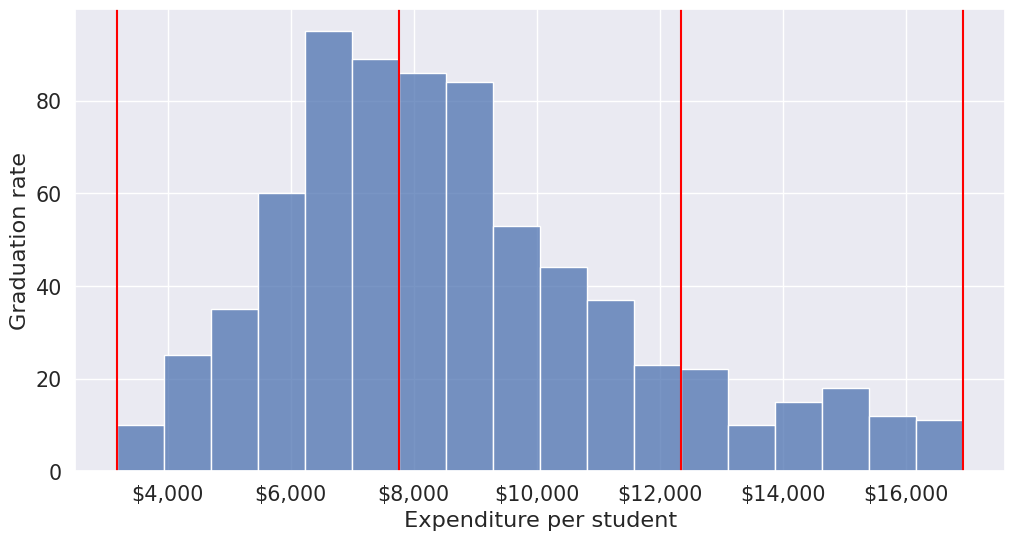

In [185]:
sns.set(font_scale=1.35)
ax=sns.histplot(data = college_data_without_outliers, x= 'Expend')
for i in range(4):
    plt.axvline(Binned_data[1][i], 0,100,color='red')
plt.xlabel('Expenditure per student');
plt.ylabel('Graduation rate');
ax.xaxis.set_major_formatter('${x:,.0f}')

Note that the right tail of the histogram has disappered since we removed outliers.

In [186]:
college_data_without_outliers['Expend_bin'].value_counts()

,count
Expend_bin,
Med expend,327
Low expend,314
High expend,88


### Practice exercise 4

Consider the dataset created for *survey_data_clean.csv* in [Practice exercise 3](https://nustat.github.io/DataScience_Intro_python/Data%20cleaning%20and%20preparation.html#practice-exercise-3), which includes dummy variables for all the categorical variables. Find the number of outliers in each column of the dataset based on the Tukey's fences criterion. Do not use a `for` loop.

Which column(s) have the maximum number of outliers?

Do you think the outlying observations identified with the Tukey's fences criterion for those columns(s) should be considered as outliers? If not, then which type of columns should be considered when finding outliers?

**Solution:**

In [188]:
#Function to identify outliers based on Tukey's fences
def rem_outliers(x):
    q1 =x.quantile(0.25)
    q3 = x.quantile(0.75)
    intQ_range = q3-q1

    #Tukey's fences
    Lower_fence = q1 - 1.5*intQ_range
    Upper_fence = q3 + 1.5*intQ_range

    #The object returned will be a data frame with bool values - True or False. 'True' will indicate that the value is an outlier
    return ((x<Lower_fence) | (x>Upper_fence))

survey_dummies.select_dtypes(include=np.number).apply(rem_outliers).sum().sort_values(ascending=False)

,0
much_effort_is_lack_of_talent,48
cant_change_math_ability,42
math_is_genetic,36
used_python_before,35
only_child,29
num_clubs,22
fav_number,19
parties_per_month,12
internet_hours_per_day,11
expected_marriage_age,10


Using Tukey's criterion, the variables `learning_style_Reading/Writing (learn best through words often note-taking or reading)` and `much_effort_is_lack_of_talent` have the most number of outliers.

However, these two variables only have 0s and 1s. For instance, let us consider `learning_style_Reading/Writing (learn best through words often note-taking or reading)`.

In [189]:
survey_dummies['learning_style_Reading/Writing (learn best through words often note-taking or reading)'].value_counts()

,count
learning_style_Reading/Writing (learn best through words often note-taking or reading),
False,144
True,48


As the percentage of 1s are $\frac{48}{48+144}=25\%$, the $75^{th}$ percentile value is 0.25, and the upper Tukey's fence is $0.25+0.25*1.25 = 0.625$, which makes the value $1$ an outlier. However, we should not consider this value as an outlier, as a considerable fraction of the data (25%) has the value $1$ for this variable.

Furthermore, Tukey's fences are developed for continuous variables. However, the variable `learning_style_Reading/Writing (learn best through words often note-taking or reading)` is discrete with only two levels. Thus, while finding outliers we must consider only continuous variables.

In [190]:
#Finding continuous variables: Assuming numeric variables that have more than 2 distinct values are continuous
continuous_variables = [x for x in list(survey_data.apply(lambda x: x.name if ((len(x.value_counts())>2) & (x.dtype!='O')) else '')) if x!='']

In [191]:
#Finding number of outliers for only continuous variables
survey_data.loc[:,continuous_variables].apply(rem_outliers).sum().sort_values(ascending=False)

,0
num_clubs,22
fav_number,19
parties_per_month,12
internet_hours_per_day,11
expected_marriage_age,10
sleep_hours_per_day,10
expected_starting_salary,8
high_school_GPA,8
height_mother,7
num_insta_followers,6


The variable `num_clubs` has the maximum number of outliers.

In [192]:
#Finding how many clubs makes a person an outlier
q3_num_clubs = survey_data.num_clubs.quantile(0.75)
q1_num_clubs = survey_data.num_clubs.quantile(0.25)
print("Tukeys fences = [",q1_num_clubs-1.5*(q3_num_clubs-q1_num_clubs),q3_num_clubs+1.5*(q3_num_clubs-q1_num_clubs),"]")

Tukeys fences = [ 0.5 4.5 ]


People joining no club, or more than 4 clubs are outliers.

In [195]:
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/TUD/Na Li/lab4/Data cleaning and preparation.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/TUD/Na Li/lab4/Data cleaning and preparation.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 1331369 bytes to /content/drive/MyDrive/TUD/Na Li/lab4/Data cleaning and preparation.html
